In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
plt.style.use('~/Python_Tool/ryan_mplstyle.mplstyle')

import numpy as np

import h5py
import cmocean.cm as cmo
import dedalus.public as d3

import sys
sys.path.insert(0, '../../subroutines')
from isospectrum import isospectrum

In [2]:
Ro = 0.032
nun2 = 3

dgname = 'EadyQGPl_dg_%.3f_%d/EadyQGPl_dg_%.3f_%d_s%i' %(Ro, nun2, Ro, nun2, 1)
dgname = dgname.replace(".", "d" ); dgname = "../"+dgname+'.h5'

with h5py.File(dgname, mode='r') as file:
    KE_data = np.squeeze(np.array(file['tasks']['KE']))
    PE_data = np.squeeze(np.array(file['tasks']['PE']))
    avgbt_data = np.squeeze(np.array(file['tasks']['avgbt']))
    avgbb_data = np.squeeze(np.array(file['tasks']['avgbb']))
    
    avgvt_data = np.squeeze(np.array(file['tasks']['avgvt']))
    avgdivbt_data = np.squeeze(np.array(file['tasks']['avgdivbt']))
    
    dg_time_ary = np.array(file['scales']['sim_time'])
    print(dg_time_ary[-10:-1])

spname = 'EadyQGPl_sp_%.3f_%d/EadyQGPl_sp_%.3f_%d_s%i' %(Ro, nun2, Ro, nun2, int((dg_time_ary[-1]-1)/10+1)-2 )
spname = spname.replace(".", "d" ); spname = "../"+spname+'.h5'

with h5py.File(spname, mode='r') as file:
    bt_data = np.squeeze(np.array(file['tasks']['b_top']))
    bb_data = np.squeeze(np.array(file['tasks']['b_bot']))
    P0y_data = np.squeeze(np.array(file['tasks']['P0_yslc']))
    zetat_data = np.squeeze(np.array(file['tasks']['zeta_top']))*0.06
    divt_data = np.squeeze(np.array(file['tasks']['div_top']))*0.06
    straint_data = np.squeeze(np.array(file['tasks']['strain_top']))*0.06
#     ut_data = np.squeeze(np.array(file['tasks']['u_top']))
#     vt_data = np.squeeze(np.array(file['tasks']['v_top']))
    P0z_data = np.squeeze(np.array(file['tasks']['P0_zslc']))
#     P1z_data = np.squeeze(np.array(file['tasks']['P1_zslc']))
    print(bt_data.shape)
    print(P0y_data.shape)
    
    sim_time_ary = np.array(file['scales']['sim_time'])
    print(sim_time_ary)
    
    x = np.array(file['scales'][list(file['scales'])[-3]])
    y = np.array(file['scales'][list(file['scales'])[-2]])
    z = np.array(file['scales'][list(file['scales'])[-1]])  

[198.99866914 199.10073773 199.20065131 199.29987792 199.40125036
 199.4988012  199.60126648 199.70123161 199.80018468]
(10, 512, 512)
(10, 512, 32)
[169.99995252 171.00080556 172.00031552 172.99980055 173.99910859
 175.00082675 176.00037732 177.00117627 177.99899597 178.99899146]


In [3]:
Nx, Ny = bt_data.shape[2], bt_data.shape[2]
L = x[-1]/(Nx-1)*Nx

time_idx = -5

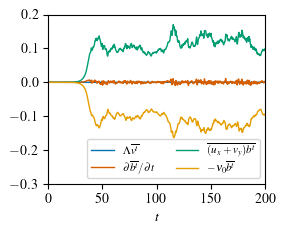

In [4]:
fig=plt.figure(figsize=(2.8, 2.2))

plt.plot(dg_time_ary,avgvt_data,label="$\Lambda\overline{v^t}$")
plt.plot(dg_time_ary[1:], (avgbt_data[1:]-avgbt_data[0:-1])/0.1,label="$\partial\overline{b^t}/\partial t$")
plt.plot(dg_time_ary,avgdivbt_data,label="$\overline{(u_x+v_y)b^{t}}$")
plt.plot(dg_time_ary,-1000/(36*np.pi**2)*avgbt_data,label="$-\\nu_0 \overline{b^t}$")

plt.xlabel("$t$")
# plt.title("$\overline{b^t}$ tendency terms")
plt.ylim(-0.3,0.2)
plt.xlim(0,200)
plt.legend(ncol=2,loc="lower right")

figname = 'figs/EadyQGpl_btend_Ro%.2f' %(Ro)
figname = figname.replace(".", "d" ); figname = figname+'.pdf'
plt.savefig(figname, bbox_inches='tight')

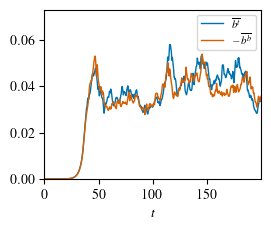

In [5]:
fig=plt.figure(figsize=(2.8, 2.2))

plt.plot(dg_time_ary, avgbt_data, label="$\overline{b^t}$")
plt.plot(dg_time_ary,-avgbb_data, label="$-\overline{b^b}$")
# plt.title("Horizontal mean bouyancy")
plt.xlabel("$t$")
plt.ylim(0,0.073)
plt.legend()

figname = 'figs/EadyQGpl_bmean_Ro%.2f' %(Ro)
figname = figname.replace(".", "d" ); figname = figname+'.pdf'
plt.savefig(figname, bbox_inches='tight')

### 